## Gaussian Processes intro - Intuition
Highly inspired on **Chris Fonnesbeck** (*Vanderbilt University Medical Center*)  
https://github.com/fonnesbeck/bayesian_mixer_london_2017

- Gaussian process generalizes the multivariate normal to infinite dimension
- Infinite vector ~ **_function_**
- Gaussian process = **_distribution over functions_**  
- GP is fully specified by **mean** and **covariance**

$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

$$\begin{aligned}
m(x) &=0 \\
k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
\end{aligned}$$

## Very Basic Intro on Gaussian Processes (Numpy)

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def kernel(a,b):
    distance = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2)-2*np.dot(a,b.T)
    return np.exp(-0.5*distance)

In [55]:
n = 20
Xtest = np.linspace(-5,5,n).reshape(-1,1)

In [56]:
K_ = kernel(Xtest,Xtest)
K_.shape

(20, 20)

In [57]:
## Draw samples from the prior
n_prior = 2
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size = (n,n_prior)))
f_prior

array([[-3.35839982e-04,  4.44538079e-04],
       [-9.18915479e-04, -4.07565503e-04],
       [-1.62434632e-04,  5.78607881e-04],
       [-1.04727589e-04,  1.73577199e-03],
       [ 7.34601045e-04,  1.19698083e-04],
       [ 1.13448841e-03, -1.37063221e-04],
       [ 1.09338981e-04,  7.81061622e-04],
       [ 7.56014426e-04, -6.72164238e-04],
       [ 9.45171091e-04, -9.05875401e-04],
       [-6.20068489e-06, -2.90774774e-03],
       [ 1.83404391e-03,  7.90245097e-04],
       [-2.67795310e-03,  2.93914602e-04],
       [ 1.33192714e-03,  3.38125306e-03],
       [-2.84907704e-04, -6.21657936e-04],
       [-2.88171796e-04, -2.94678456e-04],
       [-3.17126825e-04, -1.73074626e-03],
       [-9.81249994e-04,  1.51172508e-03],
       [ 9.39741334e-04,  4.99367278e-04],
       [ 8.49848044e-04, -8.76221970e-04],
       [-5.94945781e-04,  4.91491307e-05]])

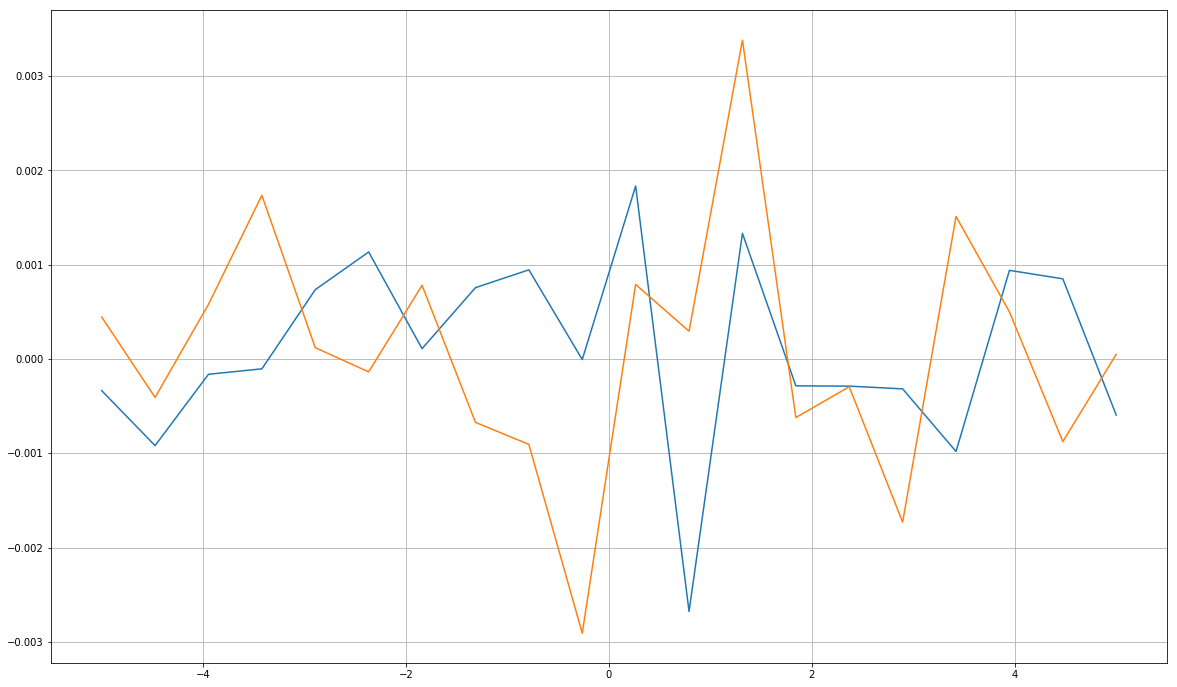

In [58]:
plt.figure(figsize = (20,12))
plt.plot(Xtest, f_prior)
plt.grid()

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.cm as cmap
sns.set_context('talk')

In [2]:
np.random.seed(42)

def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

## Conditional proprietry of multivariate Gaussian Distributions

In [3]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

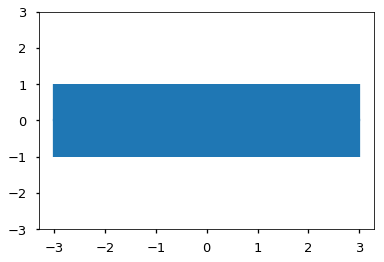

In [4]:
## Gaussian Prior teta = 1,10, zero mean
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
plt.ylim(-3, 3);

## Conditioning in a first point

In [5]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.4967141530112327]

In [6]:
σ_1 = exponential_cov(x, x, θ)
σ_1

array([[1.]])

In [7]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [8]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

In [9]:
print(x_pred.shape)

(1000,)


In [10]:
predictions

[(8.964952284247832e-36, 1.0),
 (1.1397370424705615e-35, 1.0),
 (1.4484539263965649e-35, 1.0),
 (1.8401280607899593e-35, 1.0),
 (2.3368710674175548e-35, 1.0),
 (2.9666396440562554e-35, 1.0),
 (3.764767677767483e-35, 1.0),
 (4.775896508526845e-35, 1.0),
 (6.056405903563101e-35, 1.0),
 (7.677474484878087e-35, 1.0),
 (9.72893115722918e-35, 1.0),
 (1.2324100170880088e-34, 1.0),
 (1.5605893893992313e-34, 1.0),
 (1.975447174805388e-34, 1.0),
 (2.499686429952123e-34, 1.0),
 (3.1619062220367533e-34, 1.0),
 (3.998119573761284e-34, 1.0),
 (5.05365875258335e-34, 1.0),
 (6.385565852613862e-34, 1.0),
 (8.06559115707682e-34, 1.0),
 (1.0183952398746084e-33, 1.0),
 (1.2854046251914558e-33, 1.0),
 (1.621835105311642e-33, 1.0),
 (2.0455819171834745e-33, 1.0),
 (2.5791131510096197e-33, 1.0),
 (3.2506278869541e-33, 1.0),
 (4.0955049815953456e-33, 1.0),
 (5.158114769118253e-33, 1.0),
 (6.494083738936134e-33, 1.0),
 (8.173124388275998e-33, 1.0),
 (1.0282569973145086e-32, 1.0),
 (1.2931788092340988e-32, 1.0)

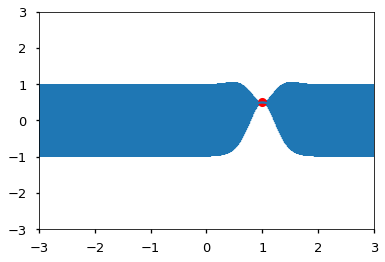

In [11]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

## Condition on a second point

In [12]:
point = -0.7
m, s = conditional([point], x, y, θ)
y2 = np.random.normal(m, s)
x.append(point)
y.append(y2)

In [13]:
x, y

([1.0, -0.7], [0.4967141530112327, -0.1382640378102619])

In [14]:
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

In [15]:
σ_2

array([[1.0000000e+00, 5.3020612e-07],
       [5.3020612e-07, 1.0000000e+00]])

In [16]:
predictions

[(-4.504234747533777e-13, 1.0),
 (-5.170533045927396e-13, 1.0),
 (-5.93325427072544e-13, 1.0),
 (-6.806031326309126e-13, 1.0),
 (-7.804377491803457e-13, 1.0),
 (-8.945939001290803e-13, 1.0),
 (-1.025078059845966e-12, 1.0),
 (-1.1741708239568569e-12, 1.0),
 (-1.3444633629377127e-12, 1.0),
 (-1.5388985845700429e-12, 1.0),
 (-1.7608175946252593e-12, 1.0),
 (-2.014012116403401e-12, 1.0),
 (-2.30278360930226e-12, 1.0),
 (-2.632009915357398e-12, 1.0),
 (-3.007220361699432e-12, 1.0),
 (-3.4346803572445426e-12, 1.0),
 (-3.92148664492365e-12, 1.0),
 (-4.475674507739947e-12, 1.0),
 (-5.106338379442669e-12, 1.0),
 (-5.823767480306333e-12, 1.0),
 (-6.6395982872459694e-12, 1.0),
 (-7.566985857333059e-12, 1.0),
 (-8.620796256947194e-12, 1.0),
 (-9.817822607769786e-12, 1.0),
 (-1.1177027548339728e-11, 1.0),
 (-1.2719815228917287e-11, 1.0),
 (-1.4470336311248359e-11, 1.0),
 (-1.6455829837095177e-11, 1.0),
 (-1.8707006264058317e-11, 1.0),
 (-2.1258476448635692e-11, 1.0),
 (-2.4149231889389917e-11, 1.0)

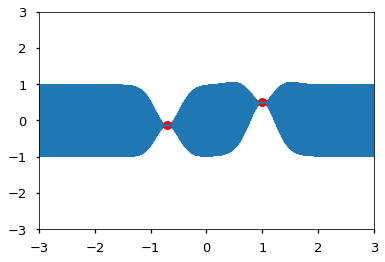

In [17]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

## Sampling on more points

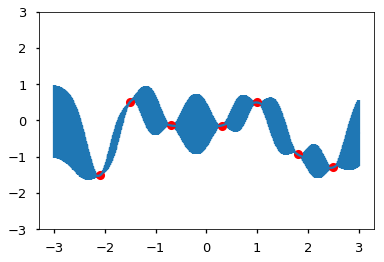

In [18]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

In [19]:
σ_new.shape

(7, 7)

## PyMC3 landing page

In [20]:
import pymc3 as pm
import numpy as np
from pymc3 import gp
from pymc3.gp import cov, Latent
from pymc3 import MvNormal, Normal, Bernoulli, Gamma, HalfCauchy, Uniform, Flat, Binomial, Exponential, HalfNormal
from pymc3 import traceplot, forestplot, summary, generator, energyplot
from pymc3.math import invprobit, invlogit
from pymc3.gp.util import plot_gp_dist

/Users/rsilvei/Envs/bayesian/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [64]:
num_points = 5
x = np.linspace(0, 10, num = num_points).reshape(-1,1)
noise = np.random.normal(loc = 20, scale = 80, size = num_points).reshape(-1,1)
y = np.random.random(num_points)
y.shape
#y = y.squeeze(1)

(5,)

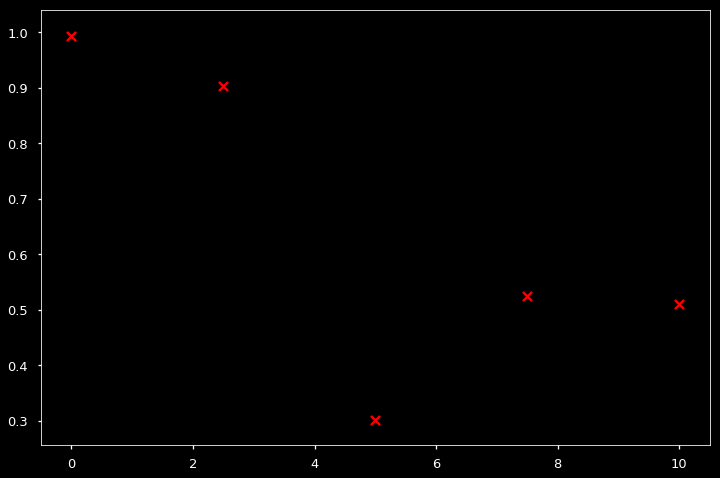

In [65]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
plt.scatter(x,y, marker = 'x',c='r')

In [66]:
with pm.Model() as fit_model:

    ρ = pm.HalfCauchy('ρ', 3)
    η = pm.HalfCauchy('η', 3)
    
    ## Mean
    M = pm.gp.mean.Zero()
    
    ## Covariance
    cov = η * pm.gp.cov.ExpQuad(1, ρ) 
    
    gp = pm.gp.Marginal(mean_func=M, cov_func=cov)
    
    noise_sig = pm.HalfCauchy('σ', 2.5)
    likelyhood = gp.marginal_likelihood('likelyhood', 
                                      X=x, 
                                      y=y, 
                                      noise=noise_sig**2)

In [67]:
with fit_model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(700, 
                      cores=2, 
                      chains=2, 
                      tune=200, 
                      step=step, 
                      start=start,
                      progressbar=True,
                      njobs=1)

logp = -8.1507, ||grad|| = 0.00084093: 100%|██████████| 37/37 [00:00<00:00, 570.78it/s]  
Sequential sampling (2 chains in 1 job)
NUTS: [σ_log__, η_log__, ρ_log__]
100%|██████████| 900/900 [00:06<00:00, 144.04it/s]
The acceptance probability does not match the target. It is 0.9023297876682016, but should be close to 0.8. Try to increase the number of tuning steps.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8926501525656658, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [68]:
## Test range
test_range = np.linspace(0, 10, 100).reshape(-1, 1)

In [69]:
with fit_model:
    fit_pred = gp.conditional("fit_pred", test_range)
    fit_samples = pm.sample_ppc(trace, vars=[fit_pred], samples=10)

100%|██████████| 10/10 [00:00<00:00, 25.83it/s]


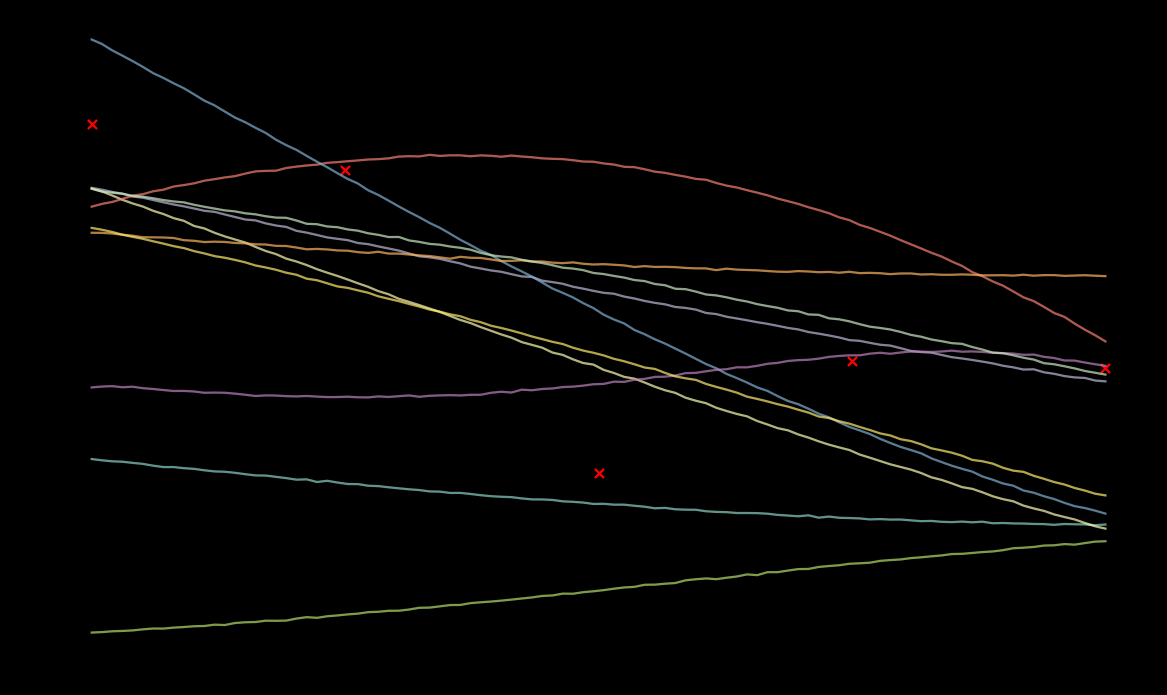

In [72]:
plt.style.use('dark_background')
plt.figure(figsize = (20,12))
plt.scatter(x,y, marker = 'x',c='r')
for sample in fit_samples['fit_pred']:
    plt.plot(test_range,sample, alpha = 0.7)
plt.axis('off')
plt.savefig("FIG_capa.png", bbox_inches='tight')

In [71]:
!ls

FIG_capa.png                            gaussian_process_PyMC3.ipynb
deep_ensemble_uncertainty_Pytorch.ipynb gaussian_processes_intro.ipynb
deep_ensembles_uncertainty.ipynb


## Softmax Demo

In [73]:
import numpy as np

In [79]:
samples = np.array([1, 2.0, 0.002, 0.992])

In [80]:
def softmax(inp):
    return np.exp(inp)/(np.sum(np.exp(inp)))

In [81]:
softmax(samples)

array([0.19689188, 0.53520761, 0.07257748, 0.19532303])

In [82]:
samples = np.array([-0.002, -0.1, -0.99, 0.000001])

In [83]:
softmax(samples)

array([0.30478768, 0.27633542, 0.11347873, 0.30539817])